## 一、加载数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# 加载数据
df = pd.read_csv('movie_metadata.csv')
df

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,...,12.0,NaN,NaN,8,NaN,NaN,0,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,English,Canada,NaN,2013-06,Color,87.0,Comedy|Drama,fraud|postal worker|prison|theft|trial,NaN,...,470.0,Crystal Lowe,318.0,629,6.0,1.0,84,2283,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,7.7
5039,The Following,English,USA,TV-14,NaN,Color,43.0,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,NaN,...,593.0,Sam Underwood,319.0,73839,359.0,43.0,32000,1753,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,7.5
5040,A Plague So Pleasant,English,USA,NaN,2013-09,Color,76.0,Drama|Horror|Thriller,NaN,1400.0,...,0.0,David Chandler,0.0,38,3.0,13.0,16,0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,6.3
5041,Shanghai Calling,English,USA,PG-13,2012-11,Color,100.0,Comedy|Drama|Romance,NaN,NaN,...,719.0,Eliza Coupe,489.0,1255,9.0,14.0,660,2386,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,6.3


## 二、处理数据

### 概览数据

In [9]:
df.shape # 行列
df.count() # 查看各个列非空数据的数据量
df.isna().sum() # df.isnull().sum() 查看各列nan的个数
df.describe() # 查看数值列的描述
df.info() # 查看数据信息
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   language                   5031 non-null   object 
 2   country                    5038 non-null   object 
 3   content_rating             4740 non-null   object 
 4   title_year                 4935 non-null   object 
 5   color                      5024 non-null   object 
 6   duration                   5028 non-null   float64
 7   genres                     5043 non-null   object 
 8   plot_keywords              4890 non-null   object 
 9   budget                     4551 non-null   float64
 10  gross                      4159 non-null   float64
 11  aspect_ratio               4714 non-null   float64
 12  facenumber_in_poster       5043 non-null   int64  
 13  director_name              4939 non-null   objec

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,...,12.0,NaN,NaN,8,NaN,NaN,0,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,7.1


### 清洗

In [10]:
data = df.dropna(how='any')
data

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
5,John Carter,English,USA,PG-13,2012-07,Color,132.0,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,263700000.0,...,632.0,Polly Walker,530.0,212204,738.0,462.0,24000,1873,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Clean,French,France,R,2004-01,Color,110.0,Drama|Music|Romance,jail|junkie|money|motel|singer,4500.0,...,133.0,Don McKellar,45.0,3924,39.0,81.0,171,776,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,6.9
5027,The Circle,Persian,Iran,Not Rated,2000-05,Color,90.0,Drama,abortion|bus|hospital|prison|prostitution,10000.0,...,0.0,Mojgan Faramarzi,0.0,4555,26.0,64.0,697,5,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,7.5
5033,Primer,English,USA,PG-13,2004-10,Color,77.0,Drama|Sci-Fi|Thriller,changing the future|independent film|invention...,7000.0,...,45.0,Casey Gooden,8.0,72639,371.0,143.0,19000,368,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,7.0
5035,El Mariachi,Spanish,USA,R,1992-03,Color,81.0,Action|Crime|Drama|Romance|Thriller,assassin|death|guitar|gun|mariachi,7000.0,...,20.0,Consuelo Gómez,6.0,52055,130.0,56.0,0,147,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,6.9


## 三、分析数据

### 1.电影发展趋势

<ipython-input-16-acbf0e65ac15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['title_year'].apply(lambda x:x[:4])
<ipython-input-16-acbf0e65ac15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['title_year'].apply(lambda x:x[5:])


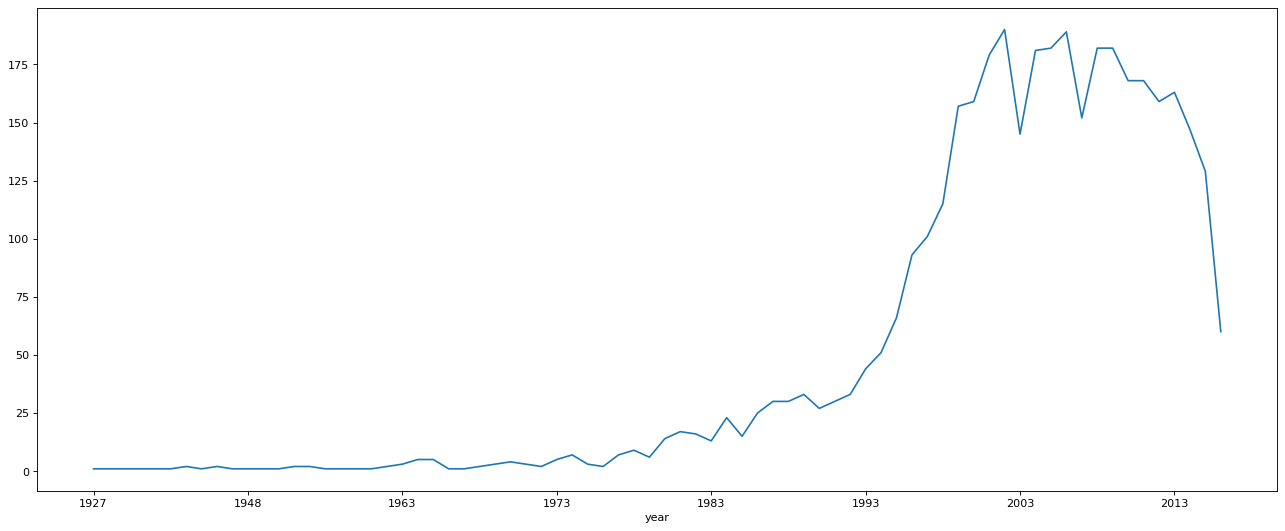

In [16]:
# 历年来电影数量走势（按照年进行统计）
data['year'] = data['title_year'].apply(lambda x:x[:4])
data['month'] = data['title_year'].apply(lambda x:x[5:])

# 每年电影数量走势（按年分组统计，折线）
movie_year_count = data.groupby('year')['movie_title'].count()
plt.figure(figsize=(20,8),dpi=80)
movie_year_count.plot() # pandas的绘图的方法
plt.show()

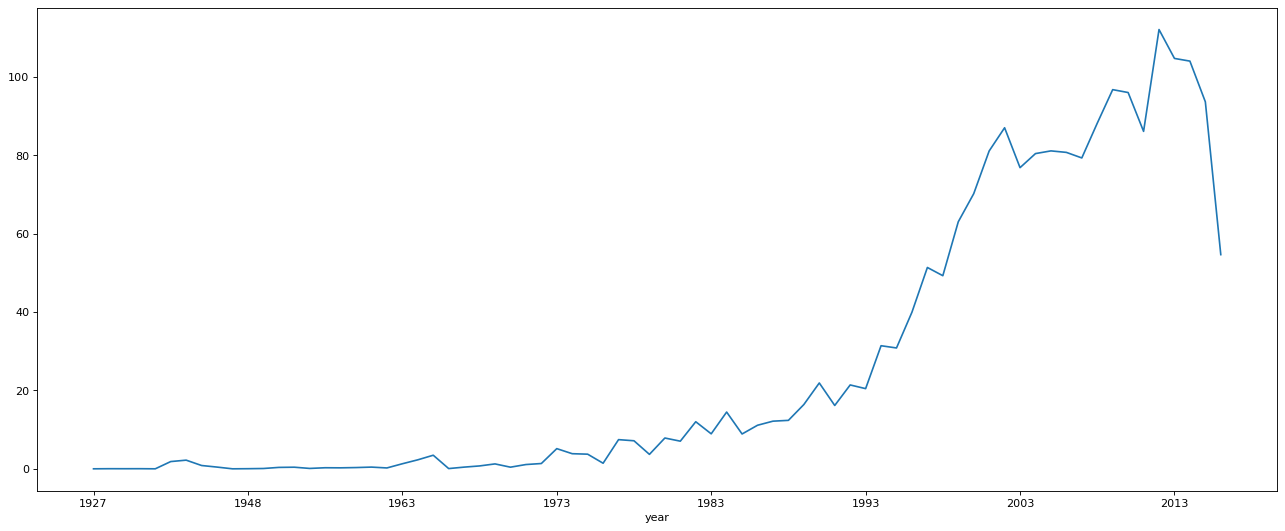

In [17]:
#历年来电影票房走势
movie_years_gross = data.groupby('year')['gross'].sum()/10000/10000
plt.figure(figsize=(20,8),dpi=80)
movie_years_gross.plot()
# plt.savefig('movie_years_gross.png')
plt.show()

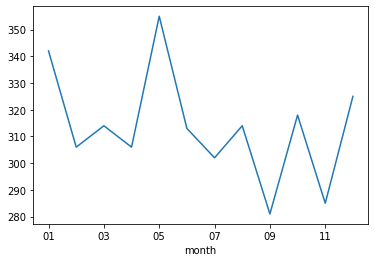

In [18]:
#月份电影数量走势 
movie_month_count = data.groupby('month')['movie_title'].count()
plt.figure()
movie_month_count.plot()
# plt.savefig('movie_month_count.png')
plt.show()

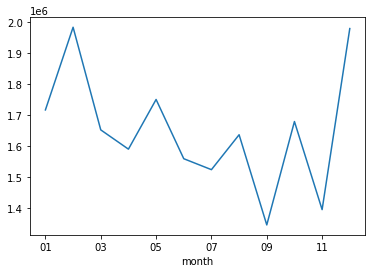

In [19]:
#月份票房走势 
movie_month_gross = data.groupby('month')['gross'].sum()/10000
plt.figure()
movie_month_gross.plot()
# plt.savefig('movie_years_gross.png')
plt.show()

### 拓展
电影产量与票房放在同一个图中

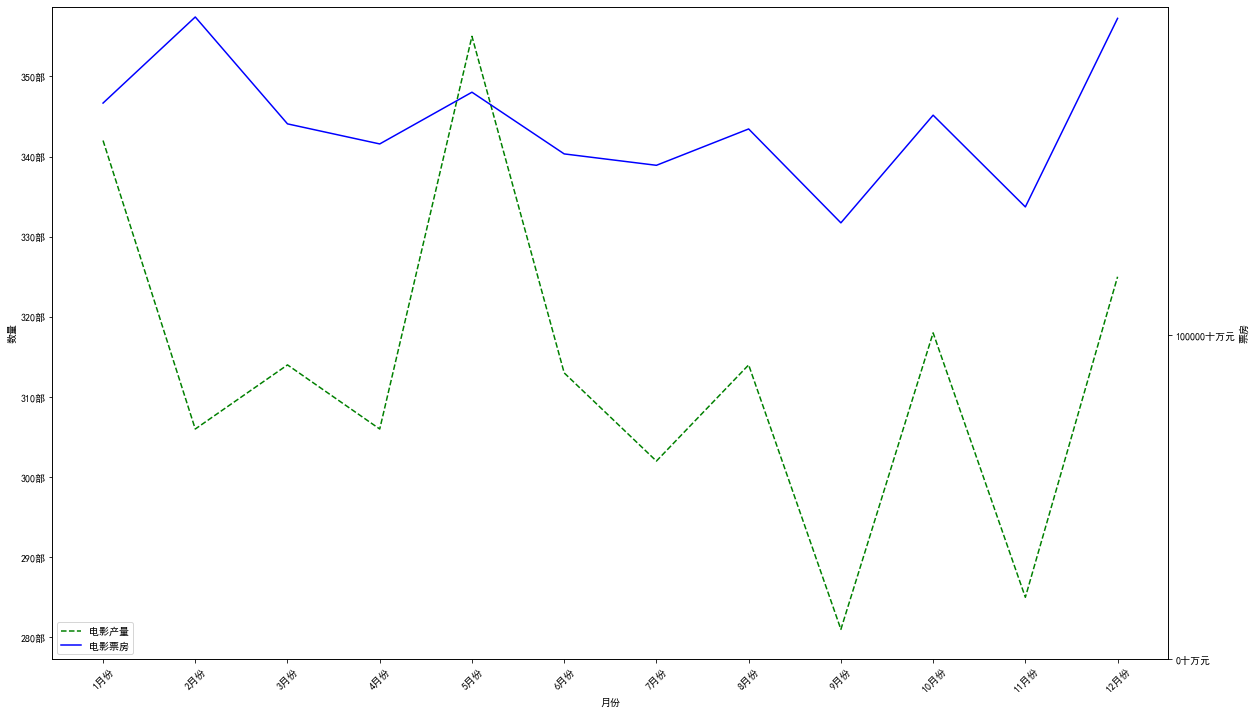

In [28]:
#设置字体 
plt.rcParams['font.sans-serif'] = 'SimHei' 
#设置子图  
fig,ax1 = plt.subplots(figsize=(20,12)) 
#一.电影数量搞定 
movie_month_count = data.groupby('month')['movie_title'].count() 
#1.1横坐标转成整数 
x = movie_month_count.index.astype('int')
x 
#1.2纵轴坐标 
y1 = movie_month_count.values.astype('int')
y1 
#1.3x轴刻度 
x_ticks_label = ["{}月份".format(i) for i in x ]
ax1.set_xticks(x) 
ax1.set_xticklabels(x_ticks_label,rotation = 45) 
#1.4y轴刻度 
y1_ticks = np.arange(0,max(y1),10) 
y1_ticks_label = ["{}部".format(i) for i in y1_ticks]
ax1.set_yticks(y1_ticks) 
ax1.set_yticklabels(y1_ticks_label) 
#1.5绘制 
ax1.plot(x,y1,'--',label="电影产量",color="g") 
ax1.set_xlabel("月份")
ax1.set_ylabel("数量")

# 电影票房数据
#共用x轴  twiny 共享y 
ax2 = ax1.twinx() 
movie_month_gross = data.groupby('month')['gross'].sum()/100000
y2 = movie_month_gross.values.astype("int")
ax2.plot(x,y2,'-',label="电影票房",color='b')
y2_ticks = np.arange(0,max(y2),100000)
y2_ticks_label =  ["{}十万元".format(i) for i in y2_ticks] 
ax2.set_yticks(y2_ticks) 
ax2.set_yticklabels(y2_ticks_label) 
#图例 
handles1,labels1 = ax1.get_legend_handles_labels() 
handles2,labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1+handles2, labels1+labels2,loc="lower left")
ax2.set_ylabel("票房")
plt.show() 

In [31]:
# 各国家电影的数量
country_movie_count = data.groupby('country')['movie_title'].count()
country_movie_count.sort_values(ascending=False)

country
USA               2992
UK                 318
France             101
Germany             80
Canada              59
Australia           39
Spain               21
Japan               15
China               13
Hong Kong           13
Italy               11
New Zealand         11
Denmark              8
South Korea          8
Ireland              7
Mexico               6
India                5
Brazil               5
Norway               4
Thailand             4
Iran                 4
Netherlands          3
Argentina            3
Russia               3
South Africa         3
Czech Republic       3
Hungary              2
Romania              2
Taiwan               2
Belgium              1
Aruba                1
Chile                1
Colombia             1
West Germany         1
Finland              1
Georgia              1
Greece               1
Iceland              1
Indonesia            1
Israel               1
New Line             1
Official site        1
Peru                 1
Pol

### 电影情况分析

电影时长分布

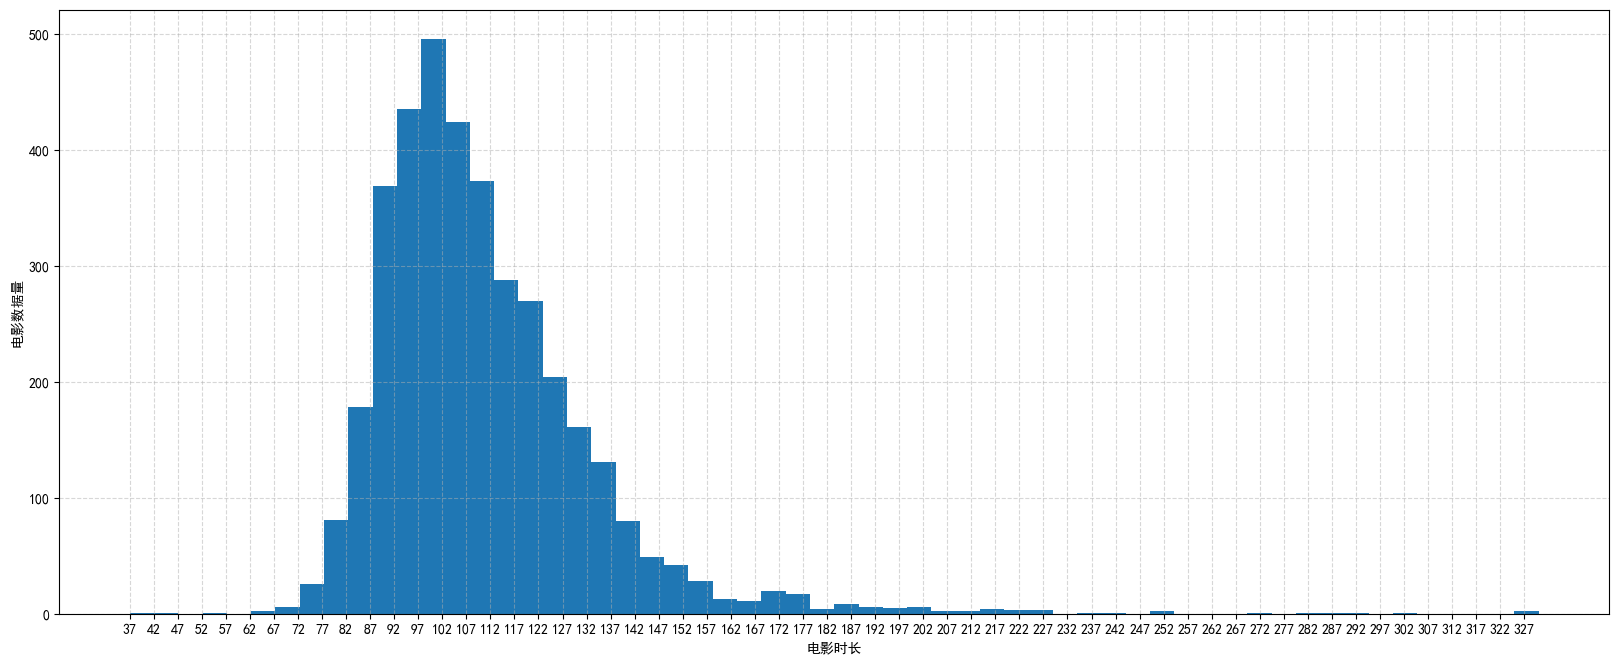

In [34]:
movie_duration = data['duration']

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制直方图
# 设置组距
distance = 5
# 计算组数
group_num = int((max(movie_duration)-min(movie_duration))/distance)
# 绘制直方图
plt.hist(movie_duration,bins=group_num)
# x轴刻度显示
plt.xticks(range(int(min(movie_duration)),int(max(movie_duration)))[::5])
# 添加网格显示
plt.grid(linestyle='--',alpha=0.5)
# 添加x,y轴信息
plt.xlabel('电影时长')
plt.ylabel('电影数据量')
plt.show()

In [51]:
# 构建一个新的dataframe，只需要类别和票房这两个特征
genre_data = pd.DataFrame(columns = ['genre','gross']) 
# data.iterrows:使用迭代器的方式读取数据，返回数字索引(int)和每一行的数据(series)
# (元组 i , row_data )
for i, row_data in data.iterrows():
    # 使用split将genres分割
    genres = row_data['genres'].split('|')
    n_genres = len(genres)
    # 构建一个空字典，用以保存genre和gross的值
    dict_obj = {}
    dict_obj['gross'] = [row_data['gross']] * n_genres
#     print(dict_obj['gross'])
    
    dict_obj['genre'] = genres
    # 将字典转为dataframe类型
    genre_df = pd.DataFrame(dict_obj)
    # DataFrame的append将genre_df的数据添加进genre_data
    genre_data = genre_data.append(genre_df)
# 将最终的数据写入csv保存
genre_data.to_csv('genre_data.csv',index=None)

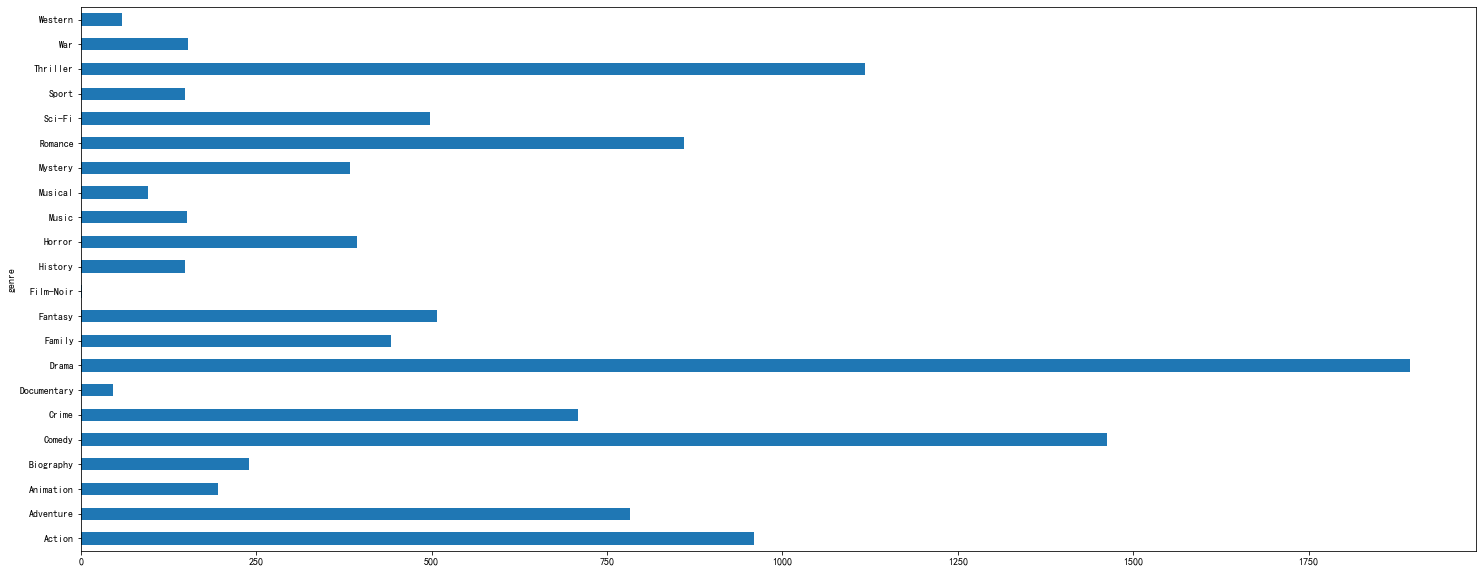

In [58]:
#按题材分类，统计个数
genre_count = genre_data.groupby('genre').size()
genre_count

genre_count1 = genre_data.groupby('genre').count()
genre_count1
plt.figure(figsize=(25.0, 10.0))
genre_count.plot(kind='barh')
# plt.savefig('genre_count.png')
plt.show() 

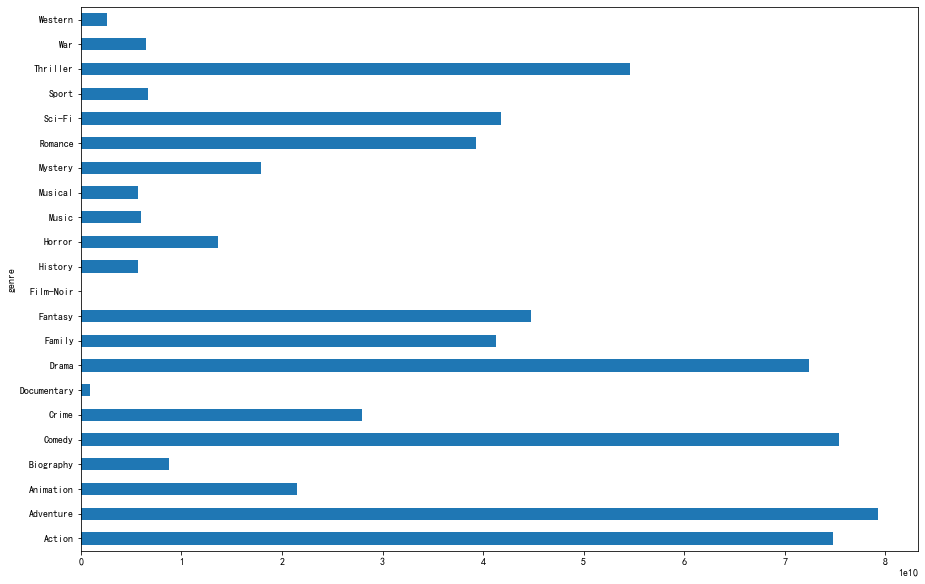

In [59]:
#按题材统计票房
genre_gross = genre_data.groupby('genre')['gross'].sum()
plt.figure(figsize=(15.0, 10.0))
genre_gross.plot(kind='barh')
# plt.savefig('genre_gross.png')
plt.show()

盈利问题

In [61]:
# 计算电影盈利字段  
data['profit'] = data.gross - data.budget 
data

group_director_gross = data.groupby(by='director_name')['gross'].sum()/10000
group_director_gross.sort_values(ascending=False) 

group_director_profit = data.groupby(by='director_name')['profit'].sum()/10000
group_director_profit.sort_values(ascending=False) 

# print(type(group_director_profit)) 
# print(group_director_profit.values)
print(group_director_profit[group_director_profit.values>0]) #盈利导演数量 
print(group_director_profit[group_director_profit.values<0]) #亏本导演数量

director_name
Aaron Schneider       167.6553
Aaron Seltzer        2854.6578
Adam Marcus          1343.5068
Adam McKay          18244.9691
Adam Shankman       27207.1855
                       ...    
Xavier Gens          1270.9528
Yarrow Cheney       24850.5540
Zach Braff           2187.0155
Zack Snyder         26519.2852
Émile Gaudreault      123.9558
Name: profit, Length: 878, dtype: float64
director_name
Abel Ferrara          -1127.2676
Adam Goldberg          -164.7420
Adam Rapp              -339.8772
Adam Rifkin           -1080.6975
Agnieszka Holland     -1064.7214
                         ...    
Yimou Zhang          -28321.4142
Zach Cregger           -145.7225
Zak Penn               -136.3170
Zal Batmanglij         -423.1704
Álex de la Iglesia     -999.6393
Name: profit, Length: 782, dtype: float64


<ipython-input-61-4fe7a33c0bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit'] = data.gross - data.budget


评分

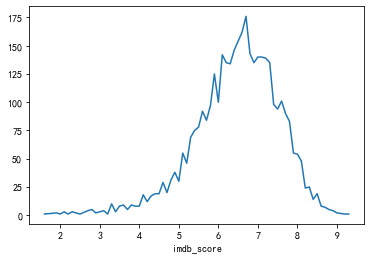

In [62]:
#查看各imdb评分的电影个数
imdb = data.groupby('imdb_score')['movie_title'].count()
plt.figure()
imdb.plot()
# plt.savefig('imdb_scores.png')
plt.show()

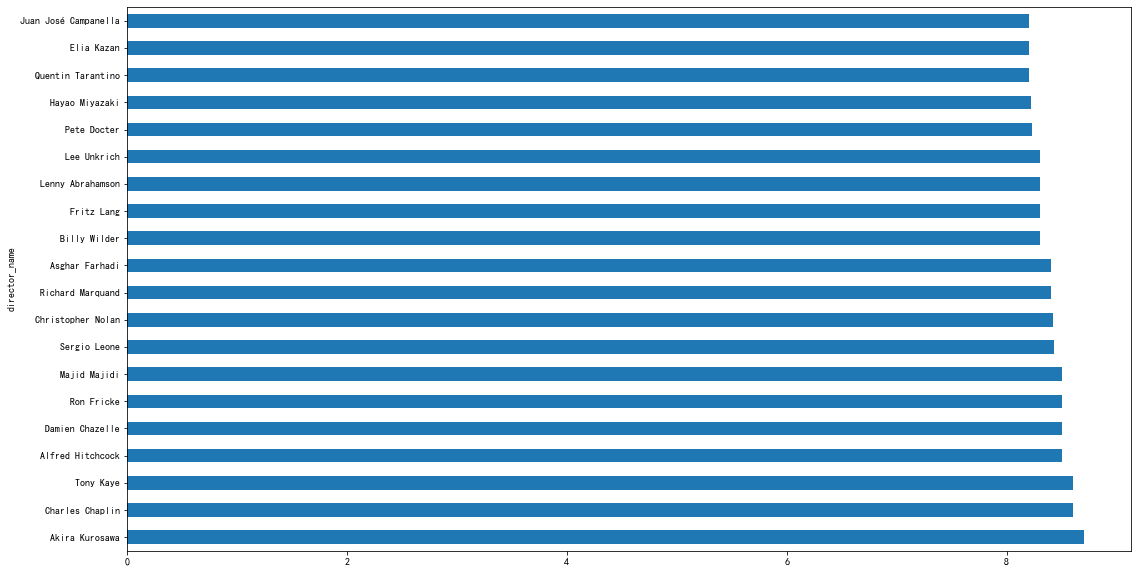

In [63]:
# 查看imdb平均分最高的前20导演
director_mean = data.groupby('director_name')['imdb_score'].mean()

# 使用sort排序，ascending=False代表降序
top20_imdb_directors = director_mean.sort_values(ascending=False)[:20]
plt.figure(figsize=(18.0, 10.0))
# kind='barh' 水平条形图
top20_imdb_directors.plot(kind='barh')
# plt.savefig('top20_imdb_directors.png')
plt.show()

In [64]:
#导演vs票房总收入
group_director = data.groupby(by='director_name')['gross'].sum()
group_director.sort_values(ascending=False)

director_name
Steven Spielberg       4.114233e+09
Peter Jackson          2.592969e+09
Michael Bay            2.231243e+09
Tim Burton             2.071275e+09
Sam Raimi              2.049549e+09
                           ...     
Paul Bunnell           2.436000e+03
Alex Craig Mann        1.332000e+03
Ricki Stern            1.111000e+03
Frank Whaley           7.030000e+02
Ekachai Uekrongtham    1.620000e+02
Name: gross, Length: 1660, dtype: float64

In [65]:
#主演vs票房总收入
group_actor = data.groupby(by=['actor_1_name'])['gross'].sum()
group_actor.sort_values(ascending=False)

actor_1_name
Johnny Depp         3.714789e+09
Harrison Ford       3.391556e+09
Tom Hanks           3.264559e+09
Tom Cruise          2.987622e+09
J.K. Simmons        2.856407e+09
                        ...     
Jim Carter          3.607000e+03
Stephen McHattie    3.478000e+03
Tatyana Ali         2.468000e+03
Kate Maberly        2.436000e+03
Darryl Hunt         1.111000e+03
Name: gross, Length: 1431, dtype: float64

In [66]:
#导演+主演vs票房收入
group_actor = data.groupby(by=['director_name','actor_1_name'])['gross'].sum()
group_actor.sort_values(ascending=False) 

director_name          actor_1_name     
Joss Whedon            Chris Hemsworth      1.705551e+09
Sam Raimi              J.K. Simmons         1.485313e+09
Gore Verbinski         Johnny Depp          1.250323e+09
George Lucas           Natalie Portman      1.165483e+09
Tim Burton             Johnny Depp          1.070126e+09
                                                ...     
Alex Craig Mann        Justin Chon          1.332000e+03
Ricki Stern            Darryl Hunt          1.111000e+03
Brian Trenchard-Smith  David Keith          7.210000e+02
Frank Whaley           Lynn Cohen           7.030000e+02
Ekachai Uekrongtham    Michael Jai White    1.620000e+02
Name: gross, Length: 3419, dtype: float64